In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
try:
	preprocessed_df = pd.read_csv(r"D:\Education\Data Science\Project\car-dheko-used-car-price-prediction\data\processed\preprocessed_data.csv")
except FileNotFoundError:
	print("File not found: './data/processed/preprocessed_data.csv'. Please check the file path or make sure the file exists.")
	preprocessed_df = None

# Identify non-numeric columns and high-cardinality categorical columns
non_numeric_cols = preprocessed_df.select_dtypes(exclude=['number']).columns.tolist()
high_cardinality_cols = [col for col in non_numeric_cols if preprocessed_df[col].nunique() > 50 and preprocessed_df[col].dtype == 'object']
# Display non-numeric and high-cardinality columns
print("Non-numeric columns:", non_numeric_cols)
print("High-cardinality categorical columns:", high_cardinality_cols)

# identify irrelevant or meta-information columns
irrelevant_keywords = ['imgUrl', 'heading', 'desc', 'feature_0_heading', 'specs_0_heading', 'commonIcon', 'bottomData']
irrelevant = [col for col in preprocessed_df.columns if any(keyword in col for keyword in irrelevant_keywords)]

# combine drop candidates
drop_candidates = list(set(non_numeric_cols + high_cardinality_cols + irrelevant))
# Display drop candidates
print("Drop candidates:", drop_candidates)

# show column types and top unique counts
column_summary = pd.DataFrame({
	'dtype': preprocessed_df.dtypes,
	'nulls': preprocessed_df.isnull().sum(),
	'n_unique': preprocessed_df.nunique(),
}).sort_values(by='n_unique', ascending=False)
# Diplay column summary
print("Column summary:\n", column_summary)

# Display the column summary in an csv
column_summary.to_csv(r"D:\Education\Data Science\Project\car-dheko-used-car-price-prediction\data\processed\column_summary.csv")




Non-numeric columns: ['new_car_detail_16_trendingText.imgUrl', 'new_car_detail_17_trendingText.heading', 'new_car_detail_18_trendingText.desc', 'new_car_overview_0_heading', 'new_car_feature_0_heading', 'new_car_feature_3_commonIcon', 'new_car_specs_0_heading', 'new_car_overview_1_top_Registration Year', 'new_car_overview_1_top_Insurance Validity', 'new_car_overview_1_top_Fuel Type', 'new_car_overview_1_top_Seats', 'new_car_overview_1_top_Kms Driven', 'new_car_overview_1_top_RTO', 'new_car_overview_1_top_Ownership', 'new_car_overview_1_top_Engine Displacement', 'new_car_overview_1_top_Transmission', 'new_car_feature_1_top_item_0', 'new_car_feature_1_top_item_1', 'new_car_feature_1_top_item_2', 'new_car_feature_1_top_item_3', 'new_car_feature_1_top_item_4', 'new_car_feature_1_top_item_5', 'new_car_feature_1_top_item_6', 'new_car_feature_1_top_item_7', 'new_car_feature_1_top_item_8', 'new_car_feature_2_data_Comfort & Convenience', 'new_car_feature_2_data_Interior', 'new_car_feature_2_dat

In [22]:
df_model = preprocessed_df.drop(columns=drop_candidates)\
# Display the shape of the model dataframe
print("Shape of the model dataframe:", df_model.shape)
# Display the first few rows of the model dataframe
print("First few rows of the model dataframe:\n", df_model.head())
# Save the cleaned model dataframe
df_model.to_csv(r"D:\Education\Data Science\Project\car-dheko-used-car-price-prediction\data\processed\model_data.csv", index=False)


Shape of the model dataframe: (8369, 21)
First few rows of the model dataframe:
    car_links  city  new_car_detail_0_it  new_car_detail_1_ft  \
0   0.711603   0.0                  0.0                 1.00   
1   0.010766   0.0                  0.0                 1.00   
2   0.929426   0.0                  0.0                 1.00   
3   0.138517   0.0                  0.0                 1.00   
4   0.783612   0.0                  0.0                 0.25   

   new_car_detail_2_bt  new_car_detail_3_km  new_car_detail_4_transmission  \
0                  0.3             0.057960                            1.0   
1                  0.8             0.320616                            1.0   
2                  0.3             0.107850                            1.0   
3                  0.9             0.157985                            1.0   
4                  0.8             0.648569                            1.0   

   new_car_detail_5_ownerNo  new_car_detail_6_owner  new_car_deta

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Step 1: Define features and target variable
target = 'new_car_detail_12_price'
x = df_model.drop(columns=[target])
y = df_model[target]

# Impute missing values in x (features)
from sklearn.impute import SimpleImputer

# Drop columns with all missing values before imputation
x_non_allnan = x.dropna(axis=1, how='all')

imputer = SimpleImputer(strategy='median')  # Or 'mean', 'most_frequent'
X = pd.DataFrame(imputer.fit_transform(x_non_allnan), columns=x_non_allnan.columns)

# Step 2: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42)
}

# Step 4: Train and evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Display results
    print(f"\n{name} Performance:")
    print(f"Model: {name}")
    print(f"MAE: {mae:.2f}, MSE: {mse:.2f}, R²: {r2:.2f}\n")


Linear Regression Performance:
Model: Linear Regression
MAE: 0.20, MSE: 0.06, R²: 0.11


Random Forest Performance:
Model: Random Forest
MAE: 0.11, MSE: 0.03, R²: 0.52



#### Interpretation:  
##### 📈 1. Linear Regression Performance  
            MAE: 0.20, MSE: 0.06, R²: 0.11

- MAE (Mean Absolute Error = 0.20)
  On average, the predicted price is off by 20% of the normalized price scale. That’s a fairly large error margin.

- MSE (Mean Squared Error = 0.06)
  Squared errors penalize large deviations. A value of 0.06 suggests some predictions have high variance from the actual values.

- R² (R-squared = 0.11)
  Only 11% of the variance in price is explained by the features.  
  👉 This means Linear Regression is a weak fit for your data — it struggles to model the relationships well.

##### 🌲 2. Random Forest Performance
            MAE: 0.11, MSE: 0.03, R²: 0.52
- MAE = 0.11
  Much better — average prediction error is 11%, nearly half the error of Linear Regression.

- MSE = 0.03
  Lower squared error means fewer large prediction mistakes.

- R² = 0.52
  Random Forest explains 52% of the variance in car prices.  
  👉 A decent model, capturing nonlinear and interaction effects better than linear regression.






### **✅ Summary**
| Metric | Linear Regression | Random Forest |
| ------ | ----------------- | ------------- |
| MAE    | 0.20              | ✅ 0.11        |
| MSE    | 0.06              | ✅ 0.03        |
| R²     | 0.11              | ✅ 0.52        |


### **✅🔍Feature Importance (Random Forest)**  
This helps you understand which features influence car prices most:

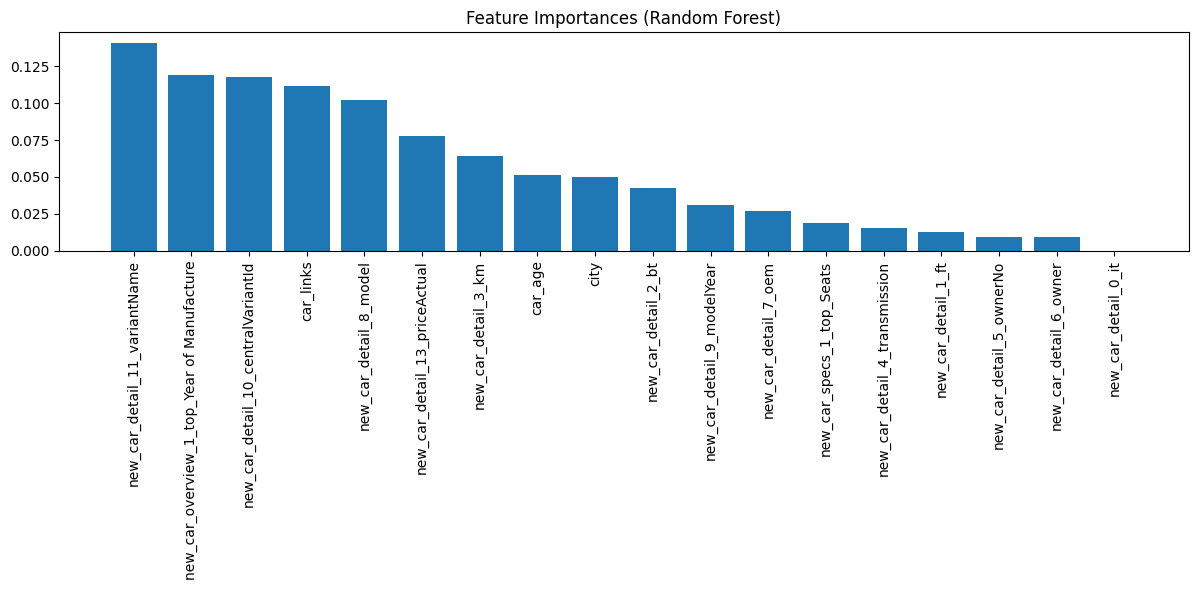

In [30]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importances from Random Forest model
importances = models["Random Forest"].feature_importances_
indices = np.argsort(importances)[::-1]
features_sorted = X.columns[indices]

# Plot feature importances
plt.figure(figsize=(12, 6))
plt.title("Feature Importances (Random Forest)")
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), features_sorted, rotation=90)
plt.tight_layout()  
plt.show()

### **✅ 🛠 Hyperparameter Tuning (GridSearchCV)**  
Find the best combination of Random Forest parameters:

In [33]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Grid Search Setup
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5]
}
grid_search = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    cv=3,
    scoring='r2',
    n_jobs=-1,
    verbose=2
)     
# Fit the grid search
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

# Evaluate the best model
y_pred_best = best_model.predict(X_test)
print("\nBest Random Forest R2:", r2_score(y_test, y_pred_best))


Fitting 3 folds for each of 8 candidates, totalling 24 fits

Best Random Forest R2: 0.5195298593297892


### **💾 Save Model for Streamlit Deployment**

In [49]:
import os
import joblib

# Navigate one level up from the notebook directory
base_dir = os.path.abspath("..") # ".." means parent directorty
model_path = os.path.join(base_dir, "model")

os.makedirs("model_path", exist_ok=True)
joblib.dump(best_model, os.path.join(model_path, "best_random_forest_model.pkl"))
print("Best model saved as 'best_random_forest_model.pkl'")


Best model saved as 'best_random_forest_model.pkl'


In [50]:
X_train.columns

Index(['car_links', 'city', 'new_car_detail_0_it', 'new_car_detail_1_ft',
       'new_car_detail_2_bt', 'new_car_detail_3_km',
       'new_car_detail_4_transmission', 'new_car_detail_5_ownerNo',
       'new_car_detail_6_owner', 'new_car_detail_7_oem',
       'new_car_detail_8_model', 'new_car_detail_9_modelYear',
       'new_car_detail_10_centralVariantId', 'new_car_detail_11_variantName',
       'new_car_detail_13_priceActual', 'car_age',
       'new_car_overview_1_top_Year of Manufacture',
       'new_car_specs_1_top_Seats'],
      dtype='object')